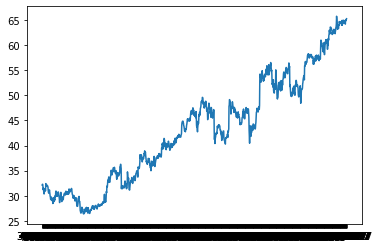

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

data=pd.read_csv("C:/Users/kenny/Desktop/microsoft.csv")
plt.plot(data['Date'], data['Close'])

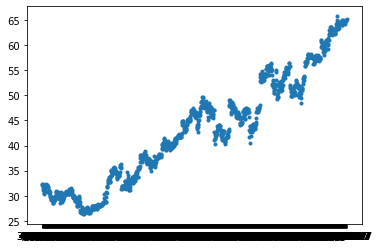

In [28]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

I=1107 # nb of training examples
J=1 # output dim
N=0 # input dim
cnt=0
xtrain=[[]for y in range(I)] # declare a 2d list features training
ytrain=[] # declare a 2d list output training
xtest=[[]for y in range(3)] # declare a 2d list features testing
ytest=[] # declare a 2d list output testing

data=pd.read_csv("C:/Users/kenny/Desktop/microsoft.csv") #load csv

plt.scatter(data['Date'], data['Close'], marker = '.') 
plt.show()

cnt=0

for r in range(I):
    if r<1104:
        for it in range (r,r+150):
            xtrain[r].append(data['Close'][it])
            if it==(r+149):
                ytrain.append(data['Close'][it+1])
    if r>=1104:
        for it in range (r,r+150):
            xtest[cnt].append(data['Close'][it])
            if it==(r+149):
                ytest.append(data['Close'][it+1])
        cnt+=1

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

I=1104 # nb of training examples
J=1 # output dim
N=0 # input dim
cnt=0
xtrain=[[]for y in range(I)] # declare a 2d list features training
ytrain=[] # declare a 2d list output training
xtest=[[]for y in range(3)] # declare a 2d list features testing
ytest=[] # declare a 2d list output testing
cnt=0
data=pd.read_csv("C:/Users/kenny/Desktop/microsoft.csv") #load csv

for r in range(1107) :
    if r<1104 :
        for it in range (r,r+150) :
            xtrain[r].append(data['Close'][it])
            #ytrain[r].append(data['Close'][it])
            if it==(r+149):
                ytrain.append(data['Close'][it+1])
    if r>=1104 :
        for it in range (r,r+150) :
            xtest[cnt].append(data['Close'][it])
                #ytrain[r].append(data['Close'][it])
            if it==(r+149):
                ytest.append(data['Close'][it+1])
        cnt+=1

def gradient_descent(x,y) :
    m_curr = b_curr = 1
    iterations = 200
    n = len(x)
    learning_rate = 0.001
    m_curr=b_curr=0
    for i in range(iterations) :
        for l in range (150) :
            y_predicted = m_curr * x[l+i-1] + b_curr
            cost = (1/n) * sum([val*2 for val in (y[l+i-1]-y_predicted)])
            md = -(2/n)*sum(x[l+i-1]*(y[l+i-1]-y_predicted))
            bd = -(2/n)*sum(y[l+i-1]-y_predicted)
            m_curr = m_curr - learning_rate * md
            b_curr = b_curr - learning_rate * bd
        #print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))
    #plt.plot(y[-1:-150])
    #plt.show()

x = np.asarray(xtrain)
y = np.asarray(ytrain)
gradient_descent(x,y)

1.221401988825437
[-0.04476977]


<function matplotlib.pyplot.show(*args, **kw)>

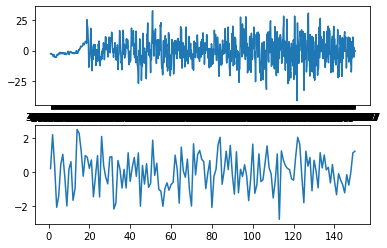

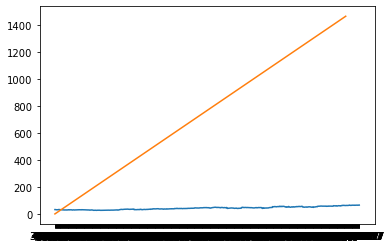

In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

N = 150    # Le nombre de features
I = 1104    # Le nombre de trainings
J = 1    # La taille de l'output

xtrain=[[]for y in range(I)] # declare a 2d list features training
ytrain=[] # declare a 2d list output training
xtest=[[]for y in range(3)] # declare a 2d list features testing
ytest=[] # declare a 2d list output testing
cnt=0
data=pd.read_csv("C:/Users/kenny/Desktop/microsoft.csv") #load csv
# On initialise les batchs de training et de test selon les lignes de l'input X (avec 150 colonnes pour les features) et de l'output Y

for r in range(1107) :
    if r<1104 :
        for it in range (r,r+150) :
            xtrain[r].append(data['Close'][it])
            #ytrain[r].append(data['Close'][it])
            if it==(r+149):
                ytrain.append(data['Close'][it+1])
    if r>=1104 :
        for it in range (r,r+150) :
            xtest[cnt].append(data['Close'][it])
                #ytrain[r].append(data['Close'][it])
            if it==(r+149):
                ytest.append(data['Close'][it+1])
        cnt+=1

alpha = 0.0001 # Le learning rate
poids = np.random.randn(1,N)
biais = np.random.randn(1,1)
x = np.asarray(xtrain)
y = np.asarray(ytrain)
y_th = np.zeros(I)

for i in range(I):
    # On calcule la prédiction de notre valeur pour le batch i
    y_th[i] = np.dot(x[i],poids.T) + biais[0]
    # On actualise les poids
    poids = poids - (alpha*(-2/N)*x[i]*(y[i]-y_th[i])) # <=> a theta = theta - alpha(htheta(x)-y)*x
    # actualisation du biais
    biais[0] = biais[0]-(alpha*(y[i]-y_th[i]))

#remp les valeur trouvées
y_th2=ytrain[0:150]
y_th2=np.concatenate((y_th2, y_th))
y_th2=np.concatenate((y_th2,ytrain[-4:-1]))

print(poids[-1,-1]) #theta
print(biais[0]) #biais

#remplis une matrice avec ses index
x_data=np.ones((1,150))
for KL in range(0,150) :
    x_data[0][KL]=KL+1
    
plt.figure(1)
plt.subplot(211)
plt.plot(data['Date'], y_th2-data['Close'])#écart entre trouvé et reele
plt.subplot(212)
plt.plot(x_data.T, poids.T)#evolution des poids


z=np.linspace(0,1200,num=1200)#pour tracer la regression

plt.figure(2)
plt.plot(data['Date'], data['Close'])
plt.plot(z,poids[-1,-1]*z+biais[0])# droite de regression
plt.show